In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df["Item_Weight"]=df["Item_Weight"].fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
filter_Outlet_Size=df["Outlet_Size"].isna()==True
df.groupby(["Outlet_Type","Outlet_Size"])[["Item_Outlet_Sales"]].count()

Item_Outlet_Sales
Outlet_Type       Outlet_Size                   
Grocery Store     Small                      528
Supermarket Type1 High                       932
                  Medium                     930
                  Small                     1860
Supermarket Type2 Medium                     928
Supermarket Type3 Medium                     935

In [ ]:
filter_Outlet_Size=df["Outlet_Size"].isna()==True
df.groupby(["Outlet_Type","Outlet_Size","Outlet_Location_Type"])[["Item_Outlet_Sales"]].count()

Item_Outlet_Sales
Outlet_Type       Outlet_Size Outlet_Location_Type                   
Grocery Store     Small       Tier 1                              528
Supermarket Type1 High        Tier 3                              932
                  Medium      Tier 1                              930
                  Small       Tier 1                              930
                              Tier 2                              930
Supermarket Type2 Medium      Tier 3                              928
Supermarket Type3 Medium      Tier 3                              935

In [ ]:
filter_spmk1=df["Outlet_Type"]=="Supermarket Type1"
filter_spmk2=df["Outlet_Type"]=="Supermarket Type2"
filter_spmk3=df["Outlet_Type"]=="Supermarket Type3"
filter_gs=df["Outlet_Type"]=="Grocery Store"

In [ ]:
filter_t1=df["Outlet_Location_Type"]=="Tier 1"
filter_t2=df["Outlet_Location_Type"]=="Tier 2"
filter_t3=df["Outlet_Location_Type"]=="Tier 3"

In [ ]:
filter_small=df["Outlet_Size"]=="Small"
filter_medium=df["Outlet_Size"]=="Medium"
filter_high=df["Outlet_Size"]=="High"

In [ ]:
df.loc[filter_spmk1&filter_Outlet_Size&filter_t2,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.00,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
33,FDO23,17.85,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.60,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
...,...,...,...,...,...,...,...,...,...,...,...,...
8501,FDW21,5.34,Regular,0.005998,Snack Foods,100.4358,OUT017,2007,NaN,Tier 2,Supermarket Type1,1508.0370
8502,NCH43,8.42,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [ ]:
df.loc[filter_Outlet_Size&filter_gs,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,LF,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
...,...,...,...,...,...,...,...,...,...,...,...,...
8400,NCE07,8.180,Low Fat,0.021977,Household,140.6154,OUT010,1998,NaN,Tier 3,Grocery Store,425.4462
8432,FDI16,14.000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,NaN,Tier 3,Grocery Store,159.7920
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,NaN,Tier 3,Grocery Store,431.4384
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744


In [ ]:
df["Outlet_Size"]=df["Outlet_Size"].fillna("Small")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.duplicated().sum() 

0

In [ ]:
for i in df:
    x= 'None' in df[i].values
    print(f'¿en la columna {i} existen none ? {x}') #Forma de buscar valores raros que no sean NaN

¿en la columna Item_Identifier existen none ? False
¿en la columna Item_Weight existen none ? False
¿en la columna Item_Fat_Content existen none ? False
¿en la columna Item_Visibility existen none ? False
¿en la columna Item_Type existen none ? False
¿en la columna Item_MRP existen none ? False
¿en la columna Outlet_Identifier existen none ? False
¿en la columna Outlet_Establishment_Year existen none ? False
¿en la columna Outlet_Size existen none ? False
¿en la columna Outlet_Location_Type existen none ? False
¿en la columna Outlet_Type existen none ? False
¿en la columna Item_Outlet_Sales existen none ? False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [ ]:
Ventas_Canales = df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum()
Ventas_Canales

Outlet_Type
Grocery Store        3.680343e+05
Supermarket Type1    1.291734e+07
Supermarket Type2    1.851823e+06
Supermarket Type3    3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

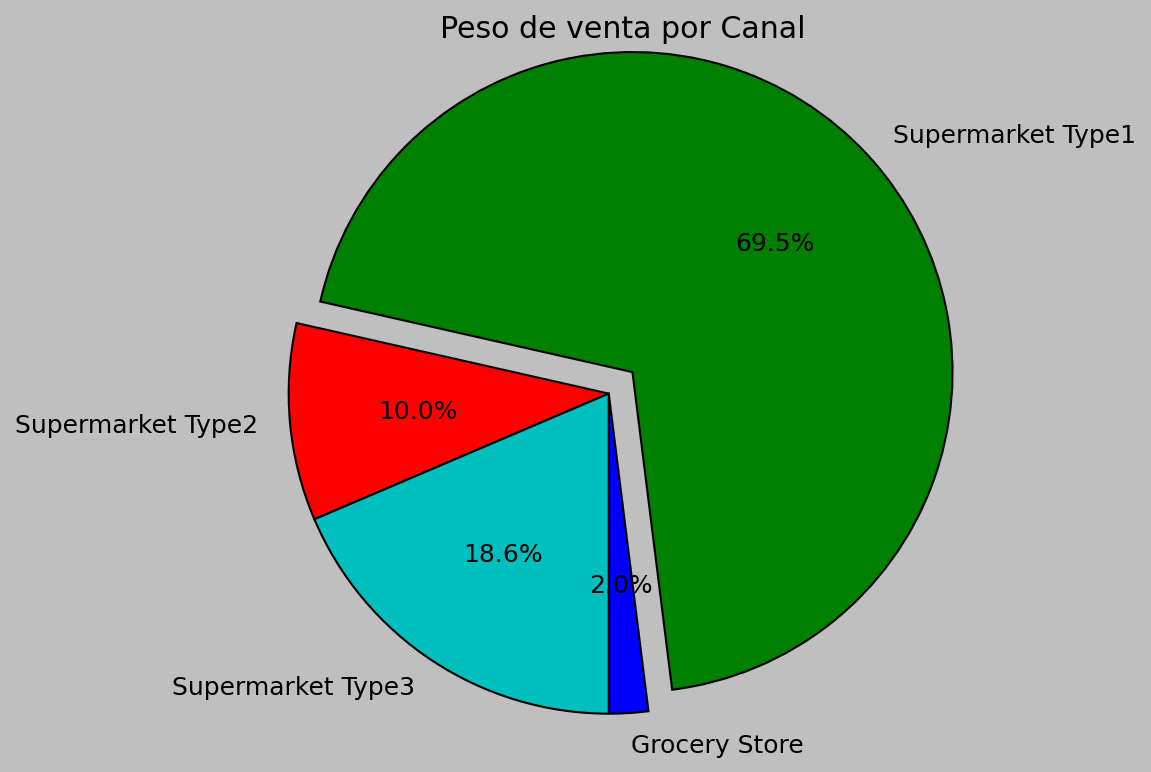

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
#Gráfico de torta; cortes ordenados y gráficados contra reloj.

size = np.array(Ventas_Canales.values)
etiquetas = np.array(Ventas_Canales.index)

explotar = [0, 0.1, 0, 0] #sirve para destacar alguna porcion. El valor es cuanto se separa de la torta.

fig1 = plt.figure(dpi=150)
ax1 = fig1.add_subplot(1,1,1) 

ax1.pie(size, labels=etiquetas, autopct="%.1f%%", explode=explotar,shadow = False, startangle=-90)
# autopct = porcentaje automático; shadow = grafico con sombra; startangle = ángulo de inicio
# %.2f%% formato de decimal, viene del lenguaje C. Sí, python está escrito en C.

ax1.axis("equal") #asegura proporcion igualitaria, vale decir, suma de porcentajes 100% (círculo)

ax1.set_title('Peso de venta por Canal')



#ax1.set_title('Peso de venta por Canal', fontsize = 16,horizontalalignment = 'left',
#             x=0.05,
#             y=1.55,
#             transform=fig.transFigure)
#ax.set_title(subtitle_t,
#             loc="left",
#             x=0.05,
#             y=0.9,
#             transform=fig.transFigure)
#Configuración Subtitulos

plt.subplots_adjust(top=0.84)

plt.show()

In [ ]:
df_s1=df.loc[filter_spmk1,:]
Venta_Categorias_s1 = df_s1.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().sort_values(ascending=False)
Venta_Categorias_s1

Item_Type
Fruits and Vegetables    1.931958e+06
Snack Foods              1.889387e+06
Household                1.437220e+06
Frozen Foods             1.292668e+06
Dairy                    1.076694e+06
Canned                   1.000560e+06
Baking Goods             8.954611e+05
Health and Hygiene       7.127549e+05
Soft Drinks              6.380255e+05
Meat                     5.810450e+05
Breads                   3.755085e+05
Hard Drinks              3.235542e+05
Starchy Foods            2.652181e+05
Others                   2.401527e+05
Breakfast                1.515268e+05
Seafood                  1.056079e+05
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
# BoxPlots
lista=["Breads""Hard Drinks","Starchy Foods","Others","Breakfast","Seafood"]
columna=[]
for categoria in df_s1['Item_Type']:
    if categoria in lista:
        columna.append("Others")
    else:
        columna.append(categoria)
#print(columna)
df_s1["Others"] = pd.Series(columna)
df_s1.head()
        
    
# create a list of our conditions


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Others
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Dairy
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Household
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Frozen Foods
6,FDO10,13.65,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,Fruits and Vegetables
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986,Fruits and Vegetables


In [ ]:
Venta_Categorias_s1 = df_s1.groupby(['Others'])['Item_Outlet_Sales'].sum().sort_values(ascending=False)
Venta_Categorias_s1

Others
Snack Foods              1.244750e+06
Fruits and Vegetables    1.232711e+06
Household                9.451011e+05
Frozen Foods             8.403182e+05
Canned                   6.537630e+05
Baking Goods             6.476563e+05
Dairy                    6.247221e+05
Health and Hygiene       5.168865e+05
Others                   4.943185e+05
Soft Drinks              4.366263e+05
Meat                     4.335603e+05
Hard Drinks              2.607240e+05
Breads                   2.318542e+05
Name: Item_Outlet_Sales, dtype: float64

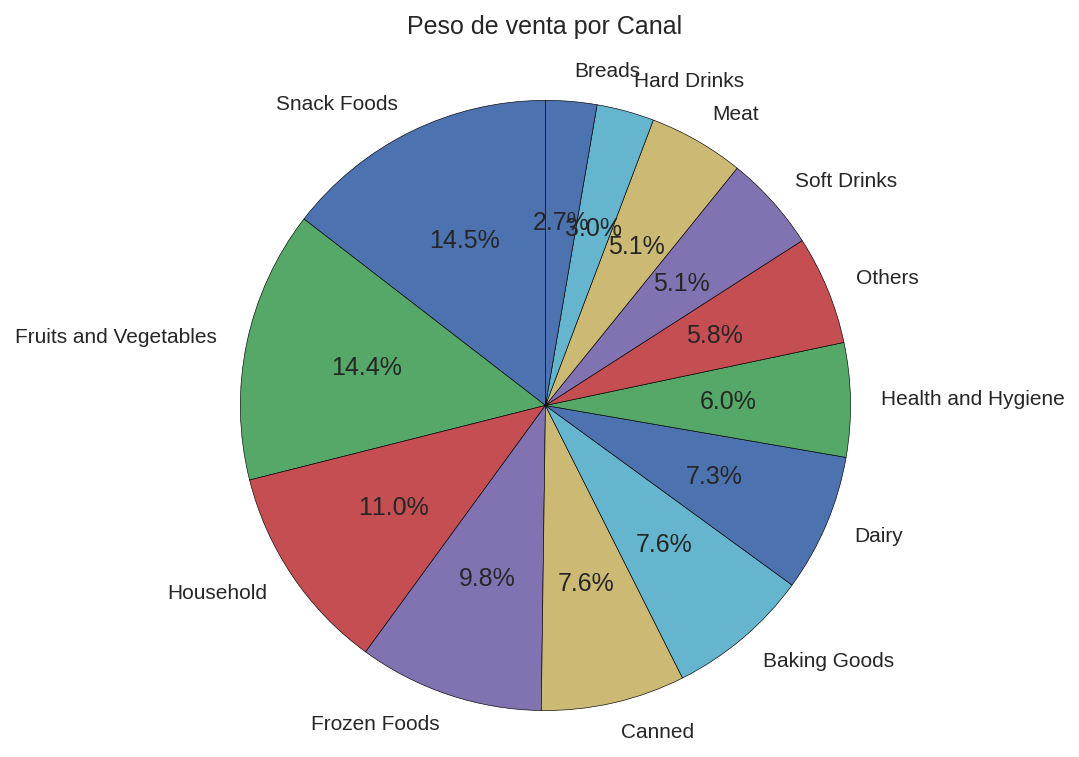

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
#Gráfico de torta; cortes ordenados y gráficados contra reloj.

size = np.array(Venta_Categorias_s1.values)
etiquetas = np.array(Venta_Categorias_s1.index)

fig1 = plt.figure(dpi=150)
ax1 = fig1.add_subplot(1,1,1) 

ax1.pie(size, labels=etiquetas, autopct="%.1f%%",shadow = False, startangle=90)

ax1.axis("equal") #asegura proporcion igualitaria, vale decir, suma de porcentajes 100% (círculo)

ax1.set_title('Peso de venta por Canal',pad=32)

plt.subplots_adjust(top=0.84)

plt.show()

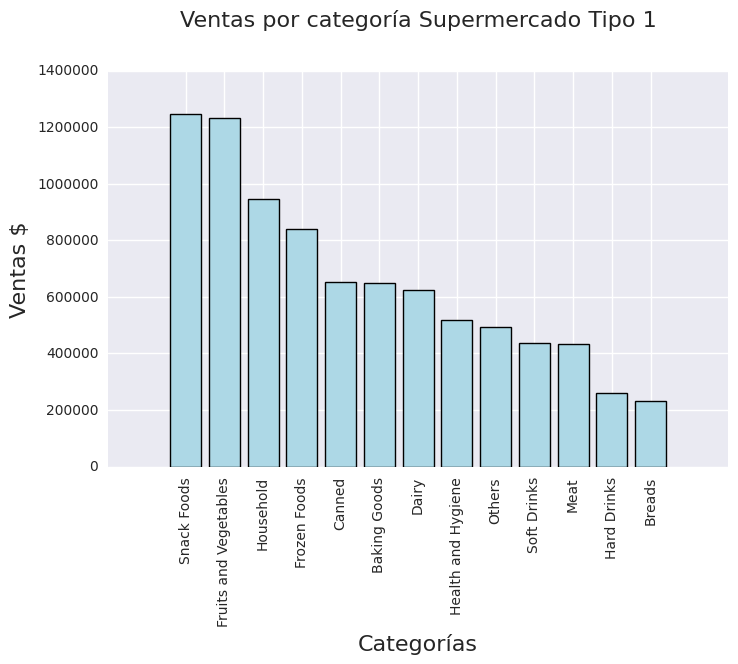

In [ ]:
import matplotlib.pyplot as plt
from numpy import arange
from numpy.random import randint

fig1 = plt.figure(dpi=100)

ax2 = fig1.add_subplot(111)
ax2.set_title('Ventas por categoría Supermercado Tipo 1', fontsize = 16,pad=32)
plt.style.use('classic')

x = arange(len(Venta_Categorias_s1.index)) #rango de 0 a 10
#print(x)

ya = np.array(Venta_Categorias_s1.values)
#print(ya, yb)


#barras - parametro 1: valores de x; parametro 2: valores en y; parametro 3: ancho de barra.
#print(x, ya, yb)
ax2.bar(x, ya, color='lightblue')
plt.xticks(rotation = 90);

ax2.set_xticks(x) #posición de etiquetas en x
ax2.set_xlabel('Categorías', fontsize = 16)
ax2.set_ylabel('Ventas $', fontsize = 16)

ax2.set_xticklabels(np.array(Venta_Categorias_s1.index)) #nombre de etiquetas en x
plt.subplots_adjust(top=0.82)
plt.show()

In [ ]:
corr = df_s1.corr()
corr.style.background_gradient(cmap='coolwarm')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.007025,0.036706,-0.015736,0.019131
Item_Visibility,-0.007025,1.000000,0.001851,0.009889,-0.013367
Item_MRP,0.036706,0.001851,1.000000,-0.004084,0.682655
Outlet_Establishment_Year,-0.015736,0.009889,-0.004084,1.000000,0.012395
Item_Outlet_Sales,0.019131,-0.013367,0.682655,0.012395,1.000000


In [ ]:
df_Filter_FV=df_s1["Item_Type"]=="Fruits and Vegetables"
df_Filter_SF=df_s1["Item_Type"]=="Seafood"
df_FV=df_s1.loc[df_Filter_FV,:]
df_SF=df_s1.loc[df_Filter_SF,:]

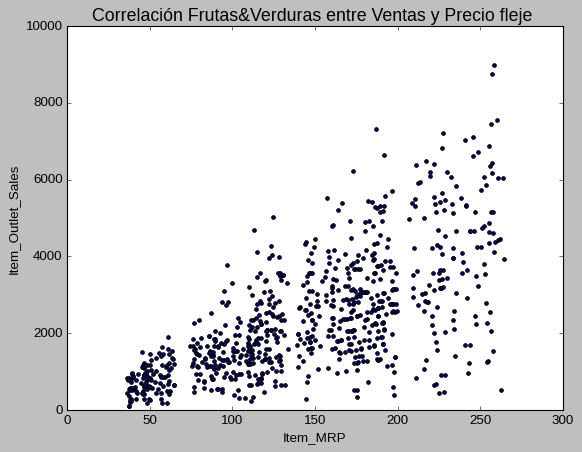

In [ ]:
ax2 = df_FV.plot.scatter(x="Item_MRP",
                      y='Item_Outlet_Sales',
                      c='DarkBlue',
                      s=10)
ax2.set_title('Correlación Frutas&Verduras entre Ventas y Precio fleje ', fontsize = 16)
plt.xlim(left=0,right=300)
plt.ylim(bottom=0,top=10000)
plt.style.use('seaborn')

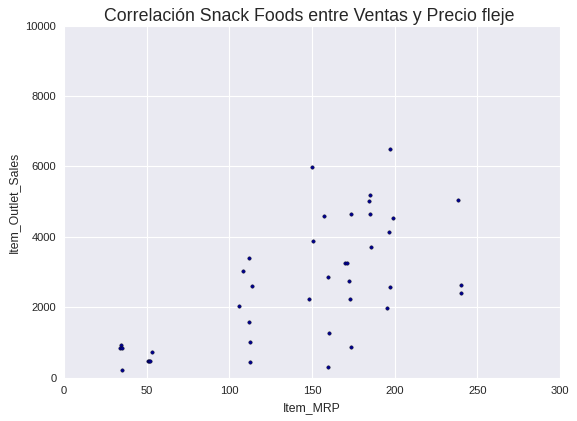

In [ ]:
ax2 = df_SF.plot.scatter(x="Item_MRP",
                      y='Item_Outlet_Sales',
                      c='DarkBlue',
                      s=10)
ax2.set_title('Correlación Snack Foods entre Ventas y Precio fleje ', fontsize = 16)
plt.xlim(left=0,right=300)
plt.ylim(bottom=0,top=10000)
plt.style.use('seaborn')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4064baa50>,
      dtype=object)

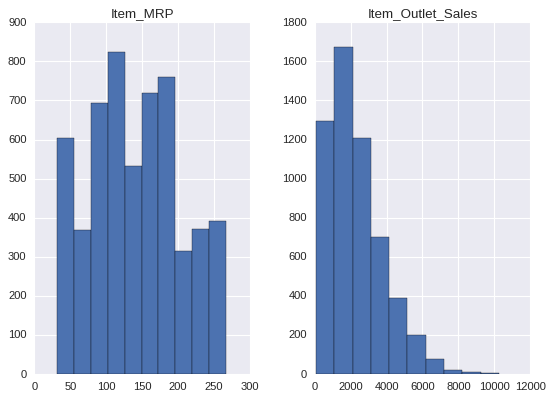

In [ ]:
df_s1[['Item_MRP','Item_Outlet_Sales']].hist()

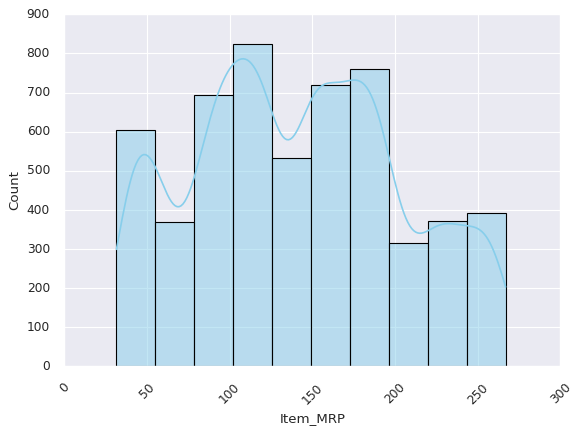

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")

sns.histplot(data=df_s1, x= 'Item_MRP', color="skyblue", kde=True, bins=10,edgecolor="black")
plt.xticks(rotation = 45)

plt.legend()
plt.show()

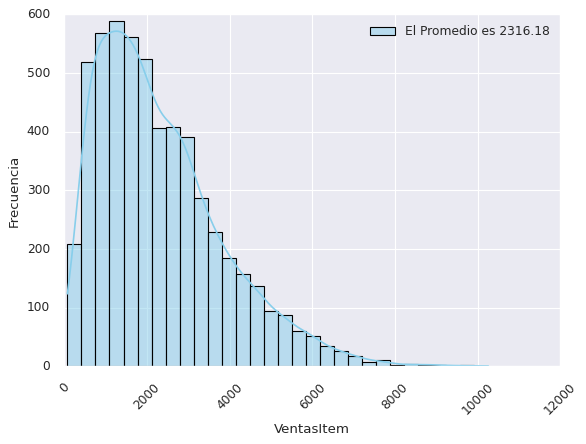

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")

#d = 'El Promedio es ' + str(round(df_s1['Item_Outlet_Sales'].mean(),2))
#h = 'La Mediana es ' + str(round(df_s1['Item_Outlet_Sales'].median(),2))
#s = 'La devest es ' + str(round(df_s1['Item_Outlet_Sales'].std(),2))

lista = 'El Promedio es ' + str(round(df_s1['Item_Outlet_Sales'].mean(),2))
sns.histplot(data=df_s1, x= 'Item_Outlet_Sales', color="skyblue", kde=True, bins=30,edgecolor="black", label=lista)
plt.xticks(rotation = 45)
plt.legend(loc=2, prop={'size': 6})

plt.xlabel('VentasItem')
plt.ylabel('Frecuencia')

plt.legend()
plt.show()

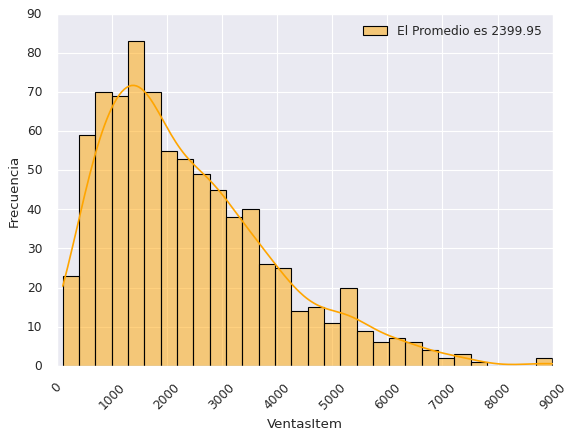

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")

#d = 'El Promedio es ' + str(round(df_s1['Item_Outlet_Sales'].mean(),2))
#h = 'La Mediana es ' + str(round(df_s1['Item_Outlet_Sales'].median(),2))
#s = 'La devest es ' + str(round(df_s1['Item_Outlet_Sales'].std(),2))

lista = 'El Promedio es ' + str(round(df_FV['Item_Outlet_Sales'].mean(),2))
sns.histplot(data=df_FV, x= 'Item_Outlet_Sales', color="Orange", kde=True, bins=30,edgecolor="black", label=lista)
plt.xticks(rotation = 45)
plt.legend(loc=2, prop={'size': 6})

plt.xlabel('VentasItem')
plt.ylabel('Frecuencia')

plt.legend()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
heightCountryYear = pd.DataFrame(df.groupby(['Outlet_Type', 'Item_Type', 'Item_Identifier'])['Item_MRP'].mean())
temp = heightCountryYear.reset_index().groupby(['Outlet_Type', 'Item_Type'])['Item_MRP'].apply(list)
temp = temp.reset_index()
temp

,Outlet_Type,Item_Type,Item_MRP
0,Grocery Store,Baking Goods,"[183.6924, 98.08840000000001, 195.0136, 107.69..."
1,Grocery Store,Breads,"[249.9092, 94.8436, 217.2166, 104.5648, 256.39..."
2,Grocery Store,Breakfast,"[167.8474, 233.32999999999998, 130.5626, 173.7..."
3,Grocery Store,Canned,"[60.2904, 38.8506, 87.71979999999999, 92.412, ..."
4,Grocery Store,Dairy,"[245.7802, 232.8142, 98.3042, 45.5718, 74.8012..."
...,...,...,...
59,Supermarket Type3,Others,"[37.519, 55.2588, 240.6196, 50.9666, 39.548, 1..."
60,Supermarket Type3,Seafood,"[109.4596, 148.705, 170.4764, 52.4982, 157.560..."
61,Supermarket Type3,Snack Foods,"[121.6072, 177.637, 196.1136, 39.548, 155.0998..."
62,Supermarket Type3,Soft Drinks,"[165.7868, 186.6924, 190.053, 106.0938, 40.282..."


In [ ]:
nanFilter = temp.loc[:, 'Item_MRP'].apply(lambda x: np.logical_not(np.isnan(x).any()))
usFilter = temp['Outlet_Type'] == 'Supermarket Type1'
yearHeight = temp.loc[nanFilter & usFilter , :]
yearHeight

,Outlet_Type,Item_Type,Item_MRP
16,Supermarket Type1,Baking Goods,"[94.17693333333334, 101.3816, 122.640533333333..."
17,Supermarket Type1,Breads,"[145.4444, 248.8592, 93.71860000000001, 217.95..."
18,Supermarket Type1,Breakfast,"[167.82240000000002, 233.10500000000002, 92.53..."
19,Supermarket Type1,Canned,"[58.9154, 38.0106, 103.574, 124.3046, 87.88646..."
20,Supermarket Type1,Dairy,"[245.8302, 232.88420000000002, 97.9792, 46.531..."
21,Supermarket Type1,Frozen Foods,"[258.8462, 220.6956, 126.70286666666668, 87.92..."
22,Supermarket Type1,Fruits and Vegetables,"[123.1572, 164.3526, 128.93273333333335, 186.0..."
23,Supermarket Type1,Hard Drinks,"[173.73960000000002, 109.02626666666667, 152.7..."
24,Supermarket Type1,Health and Hygiene,"[149.43339999999998, 149.4642, 191.75619999999..."
25,Supermarket Type1,Household,"[35.919, 116.24919999999999, 171.2356, 189.712..."


Text(0.5, 1.0, 'Precios Fleje por categoría en supermercados Tipo 1')

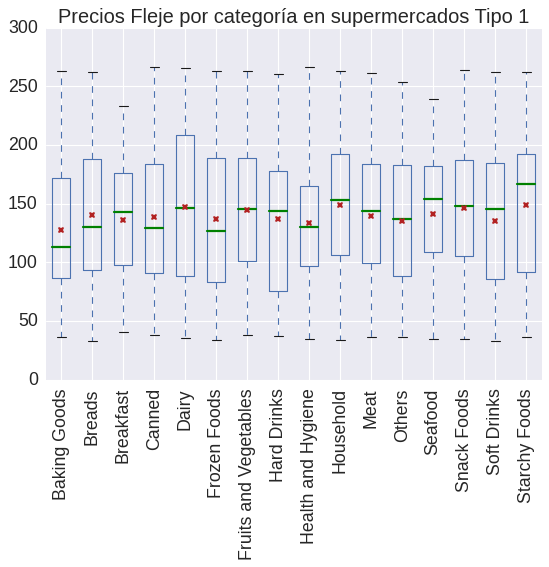

In [ ]:
plt.style.use('seaborn')
indexList = []
for index, heights in enumerate(yearHeight["Item_MRP"].values):
  plt.boxplot(yearHeight['Item_MRP'].values[index],
              positions = [index],
              widths = .6,
              medianprops = dict(linestyle='-', linewidth=2, color='green'),
              showmeans = True,
              meanprops =dict(marker='X', markeredgecolor='black',
              markerfacecolor='firebrick'))
  indexList.append(index)
plt.xticks(indexList,yearHeight['Item_Type'].values, fontsize = 16, rotation = 90)
plt.yticks(fontsize = 16)
plt.title('Precios Fleje por categoría en supermercados Tipo 1', fontsize = 18)

In [ ]:
df_s1['Rank_Item']=df_s1['Item_Outlet_Sales'].rank(ascending=False)
df_s1.sort_values(by='Rank_Item').head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Others,Rank_Item
4888,FDF39,14.850,Regular,0.019495,Dairy,261.2910,OUT013,1987,High,Tier 3,Supermarket Type1,10256.6490,Frozen Foods,1.0
4289,NCM05,6.825,Low Fat,0.059847,Health and Hygiene,262.5226,OUT046,1997,Small,Tier 1,Supermarket Type1,9779.9362,Canned,2.0
4961,FDK03,12.600,Regular,0.074339,Dairy,255.5356,OUT017,2007,Small,Tier 2,Supermarket Type1,9664.7528,Breads,3.0
997,FDK28,5.695,Low Fat,0.065961,Frozen Foods,259.2646,OUT017,2007,Small,Tier 2,Supermarket Type1,9275.9256,Frozen Foods,4.0
6409,FDA21,13.650,Low Fat,0.035931,Snack Foods,184.4924,OUT013,1987,High,Tier 3,Supermarket Type1,9069.5276,NaN,5.0


In [ ]:
from sklearn.linear_model import LinearRegression
X = df.loc[:, ['Item_MRP', 'Item_Visibility']].values
X.shape
y = df.loc[:, 'Item_Outlet_Sales'].values
y.shape
reg = LinearRegression(fit_intercept=True)
reg.fit(X,y)
score = reg.score(X, y)
print(score)


0.3384936501178184


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
score = knn.score(X, y)
score

ValueError: ignored

In [ ]:
Al ser un problema de regresión y no de clasificación no se puede utilizan KNN
Outlet_Size	Outlet_Location_Type	Outlet_Typ

In [ ]:
#df_s1['Outlet_Size'] = pd.factorize(df_s1['Outlet_Size'])[0]
#df_s1['Outlet_Location_Type'] = pd.factorize(df_s1['Outlet_Location_Type'])[0]
#df_s1['Outlet_Type'] = pd.factorize(df_s1['Outlet_Type'])[0]

In [ ]:
#corr = df_s1.corr()
#corr.style.background_gradient(cmap='coolwarm')

In [ ]:

from sklearn.model_selection import train_test_split
# Importar árboles de ensacado y clasificadores de bosques aleatorios
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [ ]:
clf = RandomForestClassifier(n_estimators=100,
                             bootstrap=True,
                             oob_score=True)

In [ ]:
clf.fit(X_train, y_train)

ValueError: ignored